## Data Download and Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor

In [23]:
! kaggle competitions download -c bike-sharing-demand

100%|████████████████████████████████████████| 189k/189k [00:03<00:00, 48.7kB/s]
100%|████████████████████████████████████████| 189k/189k [00:03<00:00, 48.7kB/s]


In [24]:
! mv bike-sharing-demand.zip ../datasets/bike-sharing-demand.zip

In [9]:
train_data = pd.read_csv('../datasets/train.csv')

In [10]:
# Basic information about the data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
train_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4167,2011-10-05 16:00:00,4,0,1,1,26.24,31.060,47,22.0028,37,245,282
8163,2012-07-01 12:00:00,3,0,0,1,36.90,40.910,37,15.0013,114,319,433
3650,2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,87
3460,2011-08-14 02:00:00,3,0,0,3,26.24,28.790,89,15.0013,13,49,62
4664,2011-11-07 10:00:00,4,0,1,1,14.76,17.425,93,8.9981,28,95,123


In [12]:
test_data = pd.read_csv('../datasets/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [13]:
test_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4061,2012-04-21 01:00:00,2,0,0,1,21.32,25.000,77,15.0013
1617,2011-07-22 09:00:00,3,0,1,1,35.26,44.695,63,6.0032
5101,2012-07-30 09:00:00,3,0,1,2,30.34,34.850,70,0.0000
4589,2012-06-20 01:00:00,2,0,1,1,27.88,31.820,79,12.9980
1921,2011-08-23 01:00:00,3,0,1,1,23.78,27.275,49,12.9980


In [14]:
train_data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


## Histogram

Text(0, 0.5, 'Season')

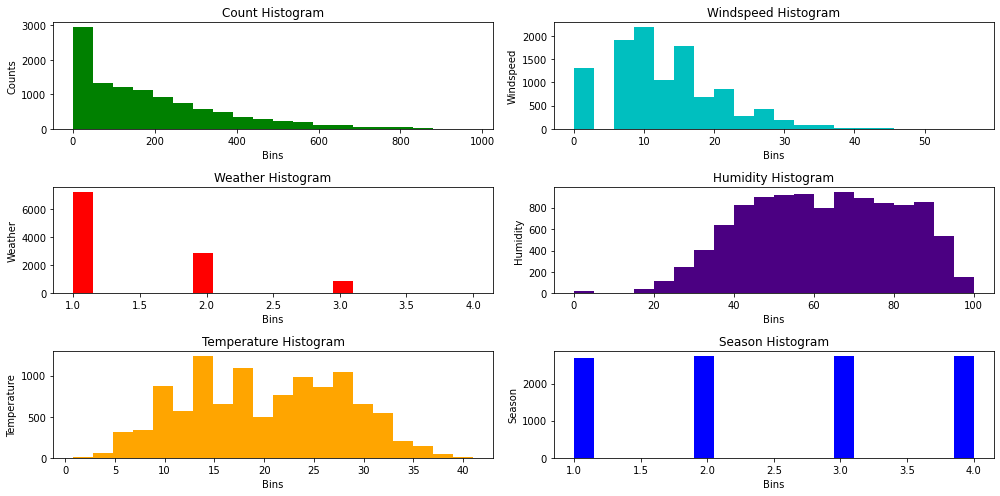

In [49]:
f, ax_arr = plt.subplots(3, 2, figsize=(14,7), tight_layout=True)
ax_arr[0,0].hist(train_data['count'], bins=20, color='green')
ax_arr[0,0].set_title('Count Histogram')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(train_data['windspeed'], bins=20, color='c')
ax_arr[0,1].set_title('Windspeed Histogram')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Windspeed')

ax_arr[1,0].hist(train_data['weather'], bins=20, color='red')
ax_arr[1,0].set_title('Weather Histogram')
ax_arr[1,0].set_xlabel('Bins')
ax_arr[1,0].set_ylabel('Weather')

ax_arr[1,1].hist(train_data.humidity, bins=20, color='indigo')
ax_arr[1,1].set_title('Humidity Histogram')
ax_arr[1,1].set_xlabel('Bins')
ax_arr[1,1].set_ylabel('Humidity')

ax_arr[2,0].hist(train_data.temp, bins=20, color='orange')
ax_arr[2,0].set_title('Temperature Histogram')
ax_arr[2,0].set_xlabel('Bins')
ax_arr[2,0].set_ylabel('Temperature')

ax_arr[2,1].hist(train_data.season, bins=20, color='blue')
ax_arr[2,1].set_title('Season Histogram')
ax_arr[2,1].set_xlabel('Bins')
ax_arr[2,1].set_ylabel('Season')



## Creating Reproducible Script

In [17]:
def train_and_predict(surfix, train_data, test_data, eval_metric=None,  time_limit=None,hyperparameters=None, hyperparameter_tune_kwargs=None, presets='medium_quality_faster_train'):
    save_path = f'../models/models{surfix}'


    predictor = TabularPredictor(
        label='count', 
        eval_metric=eval_metric, 
        path=save_path,
        learner_kwargs={'ignored_columns': ['registered', 'casual']}
    ).fit(
        train_data,
        presets=presets,
        hyperparameters=hyperparameters,
        time_limit=time_limit,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
    )
    
    y_pred = predictor.predict(test_data)
    submission = pd.read_csv('../datasets/sample_submission.csv')
    submission['count'] = y_pred
    submission['count'] = submission['count'].astype(int)
    submission.loc[submission['count'] < 0,'count'] = 0
    
    submission.to_csv(f'../datasets/my_submission{surfix}.csv', index=False)
    print(predictor.fit_summary())
    

## Training, Prediction and Kaggle Submission

### Base Model: Raw Data and default parameters for TabularPredictor

In [18]:
train_and_predict(1, train_data, test_data)

Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ...
AutoGluon will save models to "../models/models1/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['registered', 'casual']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6689.66 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to ma

[1000]	train_set's rmse: 123.922	valid_set's rmse: 137.161
[2000]	train_set's rmse: 117.532	valid_set's rmse: 136.607


	-136.5463	 = Validation root_mean_squared_error score
	3.5s	 = Training runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-135.2684	 = Validation root_mean_squared_error score
	0.85s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-124.7069	 = Validation root_mean_squared_error score
	3.38s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-136.7586	 = Validation root_mean_squared_error score
	1.67s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-133.3969	 = Validation root_mean_squared_error score
	1.

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -104.813807       0.249267  87.957639                0.000535           0.507759            2       True         12
1               XGBoost -105.579718       0.132996  73.071156                0.132996          73.071156            1       True          9
2       RandomForestMSE -124.706873       0.106873   3.383629                0.106873           3.383629            1       True          5
3         ExtraTreesMSE -133.396935       0.103532   1.782609                0.103532           1.782609            1       True          7
4         LightGBMLarge -133.504618       0.020501   1.384261                0.020501           1.384261            1       True         11
5              LightGBM -135.268429       0.024177   0.850256                0.024177           0.

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission1.csv -m "First submission with default parameters for TabularPredictor and no feature engineering"


100%|████████████████████████████████████████| 149k/149k [00:06<00:00, 25.1kB/s]
Successfully submitted to Bike Sharing Demand

### Feature Engineering Model: Processed Data with default parameters for TabularPredictor

In [19]:
# Break down the datetime column into the constituent values

def break_datetime_object(df):

    df['datetime'] = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S')
    date_object = df['datetime']
    df['year'] = date_object.dt.year
    df['month'] = date_object.dt.month
    df['day'] = date_object.dt.day
    df['hour'] = date_object.dt.hour
    df.drop('datetime', inplace=True, axis=1)

In [20]:
train_data = pd.get_dummies(train_data, columns= ['season'])
train_data['weather'] = train_data['weather'].astype('category')
train_data['holiday'] = train_data['holiday'].astype('category')
train_data['workingday'] = train_data['workingday'].astype('category')
break_datetime_object(train_data)


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     10886 non-null  category
 1   workingday  10886 non-null  category
 2   weather     10886 non-null  category
 3   temp        10886 non-null  float64 
 4   atemp       10886 non-null  float64 
 5   humidity    10886 non-null  int64   
 6   windspeed   10886 non-null  float64 
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  season_1    10886 non-null  uint8   
 11  season_2    10886 non-null  uint8   
 12  season_3    10886 non-null  uint8   
 13  season_4    10886 non-null  uint8   
 14  year        10886 non-null  int64   
 15  month       10886 non-null  int64   
 16  day         10886 non-null  int64   
 17  hour        10886 non-null  int64   
dtypes: category(3), float64(3), int64(8), uint8(4)

In [22]:
train_data.sample(5)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,year,month,day,hour
6638,0,1,1,23.78,27.275,56,7.0015,44,200,244,1,0,0,0,2012,3,13,21
7975,0,1,2,27.06,29.545,89,19.0012,30,209,239,0,1,0,0,2012,6,12,16
5915,0,1,1,18.86,22.725,55,19.0012,18,211,229,1,0,0,0,2012,2,2,16
8050,0,1,1,28.70,31.820,42,11.0014,98,369,467,0,1,0,0,2012,6,15,19
5894,0,1,1,22.14,25.760,52,19.0012,20,315,335,1,0,0,0,2012,2,1,19


In [23]:
test_data = pd.get_dummies(test_data, columns= ['season'])
test_data['weather'] = test_data['weather'].astype('category')
test_data['holiday'] = test_data['holiday'].astype('category')
test_data['workingday'] = test_data['workingday'].astype('category')
break_datetime_object(test_data)


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     6493 non-null   category
 1   workingday  6493 non-null   category
 2   weather     6493 non-null   category
 3   temp        6493 non-null   float64 
 4   atemp       6493 non-null   float64 
 5   humidity    6493 non-null   int64   
 6   windspeed   6493 non-null   float64 
 7   season_1    6493 non-null   uint8   
 8   season_2    6493 non-null   uint8   
 9   season_3    6493 non-null   uint8   
 10  season_4    6493 non-null   uint8   
 11  year        6493 non-null   int64   
 12  month       6493 non-null   int64   
 13  day         6493 non-null   int64   
 14  hour        6493 non-null   int64   
dtypes: category(3), float64(3), int64(5), uint8(4)
memory usage: 450.8 KB


In [25]:
test_data.sample(5)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,year,month,day,hour
3188,0,1,2,14.76,17.425,53,8.9981,1,0,0,0,2011,12,30,13
1370,0,1,1,29.52,34.850,74,15.0013,0,0,1,0,2011,6,23,2
5454,0,1,1,21.32,25.000,72,0.0000,0,0,1,0,2012,9,21,2
919,0,1,2,23.78,27.275,88,19.0012,0,1,0,0,2011,4,27,7
4384,0,1,2,27.06,31.060,69,6.0032,0,1,0,0,2012,5,23,12


In [26]:
train_and_predict(2, train_data, test_data)


Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ...
AutoGluon will save models to "../models/models2/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 17
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['registered', 'casual']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6781.63 MB
	Train Data (Original)  Memory Usage: 0.77 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to ma

[1000]	train_set's rmse: 47.7332	valid_set's rmse: 62.1932
[2000]	train_set's rmse: 40.3446	valid_set's rmse: 59.0552
[3000]	train_set's rmse: 35.8668	valid_set's rmse: 57.4352
[4000]	train_set's rmse: 32.7903	valid_set's rmse: 56.4875
[5000]	train_set's rmse: 30.4164	valid_set's rmse: 56.0651
[6000]	train_set's rmse: 28.4661	valid_set's rmse: 55.6407
[7000]	train_set's rmse: 26.7824	valid_set's rmse: 55.3263
[8000]	train_set's rmse: 25.3321	valid_set's rmse: 55.1135
[9000]	train_set's rmse: 24.0981	valid_set's rmse: 54.9965
[10000]	train_set's rmse: 23.0101	valid_set's rmse: 54.7883


	-54.7883	 = Validation root_mean_squared_error score
	11.09s	 = Training runtime
	1.01s	 = Validation runtime
Fitting model: LightGBM ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.2907	valid_set's rmse: 39.3173


	-39.1817	 = Validation root_mean_squared_error score
	1.07s	 = Training runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-42.0811	 = Validation root_mean_squared_error score
	4.46s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-40.5916	 = Validation root_mean_squared_error score
	9.57s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-42.4414	 = Validation root_mean_squared_error score
	2.13s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
	-48.4742	 = Validation root_mean_squared_error score
	12.72s	 = Training runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-42.8412	 = 

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -36.678342       1.354004  105.534609                0.000730           0.665091            2       True         12
1         LightGBMLarge  -38.021399       0.031524    1.794342                0.031524           1.794342            1       True         11
2              LightGBM  -39.181738       0.027914    1.072238                0.027914           1.072238            1       True          4
3              CatBoost  -40.591640       0.009284    9.567765                0.009284           9.567765            1       True          6
4        NeuralNetMXNet  -41.437275       0.165353   76.884212                0.165353          76.884212            1       True         10
5       RandomForestMSE  -42.081072       0.107649    4.464206                0.107649      

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission2.csv -m "Second submission with default parameters for TabularPredictor and data after feature engineering"


100%|████████████████████████████████████████| 149k/149k [00:09<00:00, 16.0kB/s]
Successfully submitted to Bike Sharing Demand

### HPO Model: Processed Data with Optimized hyperparameters(presets=best_quality)

In [27]:
train_and_predict(3, train_data, test_data, presets='best_quality')

Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "../models/models3/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 17
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['registered', 'casual']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6561.67 MB
	Train Data (Original)  Memory Usage: 0.77 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify 

[1000]	train_set's rmse: 48.1954	valid_set's rmse: 57.9908
[2000]	train_set's rmse: 40.4021	valid_set's rmse: 54.4702
[3000]	train_set's rmse: 35.8037	valid_set's rmse: 52.9411
[4000]	train_set's rmse: 32.6792	valid_set's rmse: 52.1784
[5000]	train_set's rmse: 30.2221	valid_set's rmse: 51.6532
[6000]	train_set's rmse: 28.199	valid_set's rmse: 51.3033
[7000]	train_set's rmse: 26.5414	valid_set's rmse: 51.1129
[8000]	train_set's rmse: 25.074	valid_set's rmse: 50.979
[9000]	train_set's rmse: 23.8072	valid_set's rmse: 50.8289
[10000]	train_set's rmse: 22.6736	valid_set's rmse: 50.8032


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.1436	valid_set's rmse: 61.473
[2000]	train_set's rmse: 40.4271	valid_set's rmse: 57.3556
[3000]	train_set's rmse: 35.9949	valid_set's rmse: 55.4735
[4000]	train_set's rmse: 32.8254	valid_set's rmse: 54.4806
[5000]	train_set's rmse: 30.434	valid_set's rmse: 53.7715
[6000]	train_set's rmse: 28.3628	valid_set's rmse: 53.2076
[7000]	train_set's rmse: 26.6412	valid_set's rmse: 52.8581
[8000]	train_set's rmse: 25.1485	valid_set's rmse: 52.6195
[9000]	train_set's rmse: 23.8616	valid_set's rmse: 52.4302
[10000]	train_set's rmse: 22.7056	valid_set's rmse: 52.2292


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.193	valid_set's rmse: 57.474
[2000]	train_set's rmse: 40.6361	valid_set's rmse: 54.7616
[3000]	train_set's rmse: 36.2193	valid_set's rmse: 53.3092
[4000]	train_set's rmse: 33.0831	valid_set's rmse: 52.5924
[5000]	train_set's rmse: 30.6427	valid_set's rmse: 52.1562
[6000]	train_set's rmse: 28.5952	valid_set's rmse: 51.7816
[7000]	train_set's rmse: 26.9124	valid_set's rmse: 51.555
[8000]	train_set's rmse: 25.4491	valid_set's rmse: 51.3421
[9000]	train_set's rmse: 24.1649	valid_set's rmse: 51.1592
[10000]	train_set's rmse: 23.0114	valid_set's rmse: 51.0063


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 47.8605	valid_set's rmse: 64.7407
[2000]	train_set's rmse: 40.2377	valid_set's rmse: 60.748
[3000]	train_set's rmse: 35.7502	valid_set's rmse: 58.8977
[4000]	train_set's rmse: 32.5663	valid_set's rmse: 57.7178
[5000]	train_set's rmse: 30.1003	valid_set's rmse: 56.8274
[6000]	train_set's rmse: 28.0998	valid_set's rmse: 56.1893
[7000]	train_set's rmse: 26.4232	valid_set's rmse: 55.7298
[8000]	train_set's rmse: 24.9856	valid_set's rmse: 55.3879
[9000]	train_set's rmse: 23.7104	valid_set's rmse: 55.0552
[10000]	train_set's rmse: 22.5666	valid_set's rmse: 54.8282


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.5558	valid_set's rmse: 57.0543
[2000]	train_set's rmse: 40.8365	valid_set's rmse: 54.0067
[3000]	train_set's rmse: 36.3626	valid_set's rmse: 52.6112
[4000]	train_set's rmse: 33.1602	valid_set's rmse: 51.851
[5000]	train_set's rmse: 30.6336	valid_set's rmse: 51.4033
[6000]	train_set's rmse: 28.6373	valid_set's rmse: 51.0776
[7000]	train_set's rmse: 26.9409	valid_set's rmse: 50.9025
[8000]	train_set's rmse: 25.4751	valid_set's rmse: 50.674
[9000]	train_set's rmse: 24.2053	valid_set's rmse: 50.5551
[10000]	train_set's rmse: 23.0488	valid_set's rmse: 50.5043


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 47.9649	valid_set's rmse: 61.841
[2000]	train_set's rmse: 40.2397	valid_set's rmse: 59.3572
[3000]	train_set's rmse: 35.791	valid_set's rmse: 58.0041
[4000]	train_set's rmse: 32.5899	valid_set's rmse: 57.1881
[5000]	train_set's rmse: 30.1435	valid_set's rmse: 56.7479
[6000]	train_set's rmse: 28.1151	valid_set's rmse: 56.395
[7000]	train_set's rmse: 26.4172	valid_set's rmse: 56.1519
[8000]	train_set's rmse: 24.9455	valid_set's rmse: 55.9609
[9000]	train_set's rmse: 23.6847	valid_set's rmse: 55.8349
[10000]	train_set's rmse: 22.5657	valid_set's rmse: 55.7897


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.3406	valid_set's rmse: 58.9292
[2000]	train_set's rmse: 40.6874	valid_set's rmse: 54.8144
[3000]	train_set's rmse: 36.2192	valid_set's rmse: 53.1583
[4000]	train_set's rmse: 33.0517	valid_set's rmse: 52.3571
[5000]	train_set's rmse: 30.5117	valid_set's rmse: 51.9071
[6000]	train_set's rmse: 28.4218	valid_set's rmse: 51.5728
[7000]	train_set's rmse: 26.6532	valid_set's rmse: 51.3266
[8000]	train_set's rmse: 25.1279	valid_set's rmse: 51.1786
[9000]	train_set's rmse: 23.8093	valid_set's rmse: 51.0843
[10000]	train_set's rmse: 22.6824	valid_set's rmse: 50.9741


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.3605	valid_set's rmse: 61.5858
[2000]	train_set's rmse: 40.6366	valid_set's rmse: 58.2912
[3000]	train_set's rmse: 36.0964	valid_set's rmse: 56.5768
[4000]	train_set's rmse: 32.9721	valid_set's rmse: 55.7472
[5000]	train_set's rmse: 30.5573	valid_set's rmse: 55.0373
[6000]	train_set's rmse: 28.5551	valid_set's rmse: 54.6718
[7000]	train_set's rmse: 26.8534	valid_set's rmse: 54.2796
[8000]	train_set's rmse: 25.3793	valid_set's rmse: 53.9768
[9000]	train_set's rmse: 24.0561	valid_set's rmse: 53.6595
[10000]	train_set's rmse: 22.9144	valid_set's rmse: 53.4791


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 47.8815	valid_set's rmse: 59.1776
[2000]	train_set's rmse: 40.203	valid_set's rmse: 56.8416
[3000]	train_set's rmse: 35.8553	valid_set's rmse: 55.7599
[4000]	train_set's rmse: 32.7631	valid_set's rmse: 55.0644
[5000]	train_set's rmse: 30.3524	valid_set's rmse: 54.5597
[6000]	train_set's rmse: 28.344	valid_set's rmse: 54.0874
[7000]	train_set's rmse: 26.6689	valid_set's rmse: 53.9042
[8000]	train_set's rmse: 25.2245	valid_set's rmse: 53.7325
[9000]	train_set's rmse: 23.9575	valid_set's rmse: 53.5523
[10000]	train_set's rmse: 22.8301	valid_set's rmse: 53.4263


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.4057	valid_set's rmse: 55.5398
[2000]	train_set's rmse: 40.7455	valid_set's rmse: 52.6368
[3000]	train_set's rmse: 36.3582	valid_set's rmse: 51.2867
[4000]	train_set's rmse: 33.2689	valid_set's rmse: 50.4623
[5000]	train_set's rmse: 30.8317	valid_set's rmse: 49.7656
[6000]	train_set's rmse: 28.8441	valid_set's rmse: 49.2772
[7000]	train_set's rmse: 27.1259	valid_set's rmse: 48.9791
[8000]	train_set's rmse: 25.6688	valid_set's rmse: 48.8017
[9000]	train_set's rmse: 24.4016	valid_set's rmse: 48.68
[10000]	train_set's rmse: 23.2798	valid_set's rmse: 48.5704


	-52.193	 = Validation root_mean_squared_error score
	140.01s	 = Training runtime
	14.0s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.1998	valid_set's rmse: 37.0494


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.5049	valid_set's rmse: 38.3108
[2000]	train_set's rmse: 16.4645	valid_set's rmse: 37.0111
[3000]	train_set's rmse: 13.0316	valid_set's rmse: 36.558


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.3569	valid_set's rmse: 33.8751


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.0048	valid_set's rmse: 39.1162
[2000]	train_set's rmse: 16.2252	valid_set's rmse: 38.3878
[3000]	train_set's rmse: 12.9201	valid_set's rmse: 38.3094


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.135	valid_set's rmse: 38.6026


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.0223	valid_set's rmse: 40.3018
[2000]	train_set's rmse: 16.0743	valid_set's rmse: 40.2616


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.1114	valid_set's rmse: 36.2958
[2000]	train_set's rmse: 16.2356	valid_set's rmse: 36.0759


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.094	valid_set's rmse: 37.1067
[2000]	train_set's rmse: 16.3575	valid_set's rmse: 36.5207


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.4174	valid_set's rmse: 41.732
[2000]	train_set's rmse: 16.4102	valid_set's rmse: 41.1961


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.4353	valid_set's rmse: 37.0984
[2000]	train_set's rmse: 16.6081	valid_set's rmse: 36.7285
[3000]	train_set's rmse: 13.0575	valid_set's rmse: 36.4675
[4000]	train_set's rmse: 10.7281	valid_set's rmse: 36.3871


	-37.4085	 = Validation root_mean_squared_error score
	22.42s	 = Training runtime
	1.41s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-42.1447	 = Validation root_mean_squared_error score
	4.31s	 = Training runtime
	0.41s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-37.7192	 = Validation root_mean_squared_error score
	179.58s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-41.5413	 = Validation root_mean_squared_error score
	2.27s	 = Training runtime
	0.43s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Def

[1000]	train_set's rmse: 9.48415	valid_set's rmse: 35.5604


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.41141	valid_set's rmse: 37.8318


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.50615	valid_set's rmse: 33.6869


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.60798	valid_set's rmse: 38.8329


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.3128	valid_set's rmse: 37.0314


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.24531	valid_set's rmse: 34.5777


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.22097	valid_set's rmse: 36.3426


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-37.1855	 = Validation root_mean_squared_error score
	34.17s	 = Training runtime
	0.99s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-35.3155	 = Validation root_mean_squared_error score
	1.03s	 = Training runtime
	0.0s	 = Validati

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-36.0131	 = Validation root_mean_squared_error score
	5.11s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ...
	-36.3792	 = Validation root_mean_squared_error score
	14.39s	 = Training runtime
	0.47s	 = Valid

	-36.6541	 = Validation root_mean_squared_error score
	20.65s	 = Training runtime
	0.23s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ...
	-35.2081	 = Validation root_mean_squared_error score
	1.14s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 2257.76s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("../models/models3/")
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future versi

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.208089      24.923623  1795.805622                0.001221           1.143099            3       True         24
1      WeightedEnsemble_L2  -35.315470      18.084489  1400.771387                0.001151           1.028518            2       True         12
2   NeuralNetFastAI_BAG_L2  -35.354812      20.417081  1716.157020                0.431176         131.732995            2       True         20
3          CatBoost_BAG_L2  -35.790407      20.058092  1614.064430                0.072188          29.640405            2       True         18
4     ExtraTreesMSE_BAG_L2  -35.919309      20.468889  1588.691701                0.482984           4.267676            2       True         19
5          LightGBM_BAG_L2  -36.013076      20.085648  1589.538440  

In [81]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission3.csv -m "Third submission with optimized parameters for TabularPredictor(presets=best_quality) and data after feature engineering"



100%|████████████████████████████████████████| 149k/149k [00:04<00:00, 36.6kB/s]
Successfully submitted to Bike Sharing Demand

### HPO Model2: Processed Data with Optimized hyperparameters (presets=high_quality_fast_inference_only_refit)

In [28]:
train_and_predict(4, train_data, test_data, presets='high_quality_fast_inference_only_refit')


Presets specified: ['high_quality_fast_inference_only_refit']
Beginning AutoGluon training ...
AutoGluon will save models to "../models/models4/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 17
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['registered', 'casual']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6313.2 MB
	Train Data (Original)  Memory Usage: 0.77 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadat

[1000]	train_set's rmse: 48.1954	valid_set's rmse: 57.9908
[2000]	train_set's rmse: 40.4021	valid_set's rmse: 54.4702
[3000]	train_set's rmse: 35.8037	valid_set's rmse: 52.9411
[4000]	train_set's rmse: 32.6792	valid_set's rmse: 52.1784
[5000]	train_set's rmse: 30.2221	valid_set's rmse: 51.6532
[6000]	train_set's rmse: 28.199	valid_set's rmse: 51.3033
[7000]	train_set's rmse: 26.5414	valid_set's rmse: 51.1129
[8000]	train_set's rmse: 25.074	valid_set's rmse: 50.979
[9000]	train_set's rmse: 23.8072	valid_set's rmse: 50.8289
[10000]	train_set's rmse: 22.6736	valid_set's rmse: 50.8032


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.1436	valid_set's rmse: 61.473
[2000]	train_set's rmse: 40.4271	valid_set's rmse: 57.3556
[3000]	train_set's rmse: 35.9949	valid_set's rmse: 55.4735
[4000]	train_set's rmse: 32.8254	valid_set's rmse: 54.4806
[5000]	train_set's rmse: 30.434	valid_set's rmse: 53.7715
[6000]	train_set's rmse: 28.3628	valid_set's rmse: 53.2076
[7000]	train_set's rmse: 26.6412	valid_set's rmse: 52.8581
[8000]	train_set's rmse: 25.1485	valid_set's rmse: 52.6195
[9000]	train_set's rmse: 23.8616	valid_set's rmse: 52.4302
[10000]	train_set's rmse: 22.7056	valid_set's rmse: 52.2292


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.193	valid_set's rmse: 57.474
[2000]	train_set's rmse: 40.6361	valid_set's rmse: 54.7616
[3000]	train_set's rmse: 36.2193	valid_set's rmse: 53.3092
[4000]	train_set's rmse: 33.0831	valid_set's rmse: 52.5924
[5000]	train_set's rmse: 30.6427	valid_set's rmse: 52.1562
[6000]	train_set's rmse: 28.5952	valid_set's rmse: 51.7816
[7000]	train_set's rmse: 26.9124	valid_set's rmse: 51.555
[8000]	train_set's rmse: 25.4491	valid_set's rmse: 51.3421
[9000]	train_set's rmse: 24.1649	valid_set's rmse: 51.1592
[10000]	train_set's rmse: 23.0114	valid_set's rmse: 51.0063


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 47.8605	valid_set's rmse: 64.7407
[2000]	train_set's rmse: 40.2377	valid_set's rmse: 60.748
[3000]	train_set's rmse: 35.7502	valid_set's rmse: 58.8977
[4000]	train_set's rmse: 32.5663	valid_set's rmse: 57.7178
[5000]	train_set's rmse: 30.1003	valid_set's rmse: 56.8274
[6000]	train_set's rmse: 28.0998	valid_set's rmse: 56.1893
[7000]	train_set's rmse: 26.4232	valid_set's rmse: 55.7298
[8000]	train_set's rmse: 24.9856	valid_set's rmse: 55.3879
[9000]	train_set's rmse: 23.7104	valid_set's rmse: 55.0552
[10000]	train_set's rmse: 22.5666	valid_set's rmse: 54.8282


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.5558	valid_set's rmse: 57.0543
[2000]	train_set's rmse: 40.8365	valid_set's rmse: 54.0067
[3000]	train_set's rmse: 36.3626	valid_set's rmse: 52.6112
[4000]	train_set's rmse: 33.1602	valid_set's rmse: 51.851
[5000]	train_set's rmse: 30.6336	valid_set's rmse: 51.4033
[6000]	train_set's rmse: 28.6373	valid_set's rmse: 51.0776
[7000]	train_set's rmse: 26.9409	valid_set's rmse: 50.9025
[8000]	train_set's rmse: 25.4751	valid_set's rmse: 50.674
[9000]	train_set's rmse: 24.2053	valid_set's rmse: 50.5551
[10000]	train_set's rmse: 23.0488	valid_set's rmse: 50.5043


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 47.9649	valid_set's rmse: 61.841
[2000]	train_set's rmse: 40.2397	valid_set's rmse: 59.3572
[3000]	train_set's rmse: 35.791	valid_set's rmse: 58.0041
[4000]	train_set's rmse: 32.5899	valid_set's rmse: 57.1881
[5000]	train_set's rmse: 30.1435	valid_set's rmse: 56.7479
[6000]	train_set's rmse: 28.1151	valid_set's rmse: 56.395
[7000]	train_set's rmse: 26.4172	valid_set's rmse: 56.1519
[8000]	train_set's rmse: 24.9455	valid_set's rmse: 55.9609
[9000]	train_set's rmse: 23.6847	valid_set's rmse: 55.8349
[10000]	train_set's rmse: 22.5657	valid_set's rmse: 55.7897


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.3406	valid_set's rmse: 58.9292
[2000]	train_set's rmse: 40.6874	valid_set's rmse: 54.8144
[3000]	train_set's rmse: 36.2192	valid_set's rmse: 53.1583
[4000]	train_set's rmse: 33.0517	valid_set's rmse: 52.3571
[5000]	train_set's rmse: 30.5117	valid_set's rmse: 51.9071
[6000]	train_set's rmse: 28.4218	valid_set's rmse: 51.5728
[7000]	train_set's rmse: 26.6532	valid_set's rmse: 51.3266
[8000]	train_set's rmse: 25.1279	valid_set's rmse: 51.1786
[9000]	train_set's rmse: 23.8093	valid_set's rmse: 51.0843
[10000]	train_set's rmse: 22.6824	valid_set's rmse: 50.9741


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.3605	valid_set's rmse: 61.5858
[2000]	train_set's rmse: 40.6366	valid_set's rmse: 58.2912
[3000]	train_set's rmse: 36.0964	valid_set's rmse: 56.5768
[4000]	train_set's rmse: 32.9721	valid_set's rmse: 55.7472
[5000]	train_set's rmse: 30.5573	valid_set's rmse: 55.0373
[6000]	train_set's rmse: 28.5551	valid_set's rmse: 54.6718
[7000]	train_set's rmse: 26.8534	valid_set's rmse: 54.2796
[8000]	train_set's rmse: 25.3793	valid_set's rmse: 53.9768
[9000]	train_set's rmse: 24.0561	valid_set's rmse: 53.6595
[10000]	train_set's rmse: 22.9144	valid_set's rmse: 53.4791


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 47.8815	valid_set's rmse: 59.1776
[2000]	train_set's rmse: 40.203	valid_set's rmse: 56.8416
[3000]	train_set's rmse: 35.8553	valid_set's rmse: 55.7599
[4000]	train_set's rmse: 32.7631	valid_set's rmse: 55.0644
[5000]	train_set's rmse: 30.3524	valid_set's rmse: 54.5597
[6000]	train_set's rmse: 28.344	valid_set's rmse: 54.0874
[7000]	train_set's rmse: 26.6689	valid_set's rmse: 53.9042
[8000]	train_set's rmse: 25.2245	valid_set's rmse: 53.7325
[9000]	train_set's rmse: 23.9575	valid_set's rmse: 53.5523
[10000]	train_set's rmse: 22.8301	valid_set's rmse: 53.4263


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.4057	valid_set's rmse: 55.5398
[2000]	train_set's rmse: 40.7455	valid_set's rmse: 52.6368
[3000]	train_set's rmse: 36.3582	valid_set's rmse: 51.2867
[4000]	train_set's rmse: 33.2689	valid_set's rmse: 50.4623
[5000]	train_set's rmse: 30.8317	valid_set's rmse: 49.7656
[6000]	train_set's rmse: 28.8441	valid_set's rmse: 49.2772
[7000]	train_set's rmse: 27.1259	valid_set's rmse: 48.9791
[8000]	train_set's rmse: 25.6688	valid_set's rmse: 48.8017
[9000]	train_set's rmse: 24.4016	valid_set's rmse: 48.68
[10000]	train_set's rmse: 23.2798	valid_set's rmse: 48.5704


	-52.193	 = Validation root_mean_squared_error score
	107.03s	 = Training runtime
	10.19s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.1998	valid_set's rmse: 37.0494


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.5049	valid_set's rmse: 38.3108
[2000]	train_set's rmse: 16.4645	valid_set's rmse: 37.0111
[3000]	train_set's rmse: 13.0316	valid_set's rmse: 36.558


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.3569	valid_set's rmse: 33.8751


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.0048	valid_set's rmse: 39.1162
[2000]	train_set's rmse: 16.2252	valid_set's rmse: 38.3878
[3000]	train_set's rmse: 12.9201	valid_set's rmse: 38.3094


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.135	valid_set's rmse: 38.6026


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.0223	valid_set's rmse: 40.3018
[2000]	train_set's rmse: 16.0743	valid_set's rmse: 40.2616


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.1114	valid_set's rmse: 36.2958
[2000]	train_set's rmse: 16.2356	valid_set's rmse: 36.0759


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.094	valid_set's rmse: 37.1067
[2000]	train_set's rmse: 16.3575	valid_set's rmse: 36.5207


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.4174	valid_set's rmse: 41.732
[2000]	train_set's rmse: 16.4102	valid_set's rmse: 41.1961


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.4353	valid_set's rmse: 37.0984
[2000]	train_set's rmse: 16.6081	valid_set's rmse: 36.7285
[3000]	train_set's rmse: 13.0575	valid_set's rmse: 36.4675
[4000]	train_set's rmse: 10.7281	valid_set's rmse: 36.3871


	-37.4085	 = Validation root_mean_squared_error score
	22.93s	 = Training runtime
	1.5s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-42.1447	 = Validation root_mean_squared_error score
	4.22s	 = Training runtime
	0.44s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-37.7192	 = Validation root_mean_squared_error score
	140.61s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-41.5413	 = Validation root_mean_squared_error score
	2.25s	 = Training runtime
	0.43s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Defin

[1000]	train_set's rmse: 9.48415	valid_set's rmse: 35.5604


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.41141	valid_set's rmse: 37.8318


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.50615	valid_set's rmse: 33.6869


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.60798	valid_set's rmse: 38.8329


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.3128	valid_set's rmse: 37.0314


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.24531	valid_set's rmse: 34.5777


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.22097	valid_set's rmse: 36.3426


/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-37.1855	 = Validation root_mean_squared_error score
	29.84s	 = Training runtime
	0.86s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-35.2739	 = Validation root_mean_squared_error score
	1.04s	 = Training runtime
	0.0s	 = Validati

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-36.0105	 = Validation root_mean_squared_error score
	5.53s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ...
	-36.3926	 = Validation root_mean_squared_error score
	14.34s	 = Training runtime
	0.53s	 = Valid

	-36.913	 = Validation root_mean_squared_error score
	13.85s	 = Training runtime
	0.16s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ...
	-35.2467	 = Validation root_mean_squared_error score
	1.34s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 2047.29s ...
Fitting model: KNeighborsUnif_BAG_L1_FULL ...
	-122.9277	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1_FULL ...
	-118.2871	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1_FULL ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and wil

[1000]	train_set's rmse: 48.6048
[2000]	train_set's rmse: 41.2375
[3000]	train_set's rmse: 36.8715
[4000]	train_set's rmse: 33.7162
[5000]	train_set's rmse: 31.3251
[6000]	train_set's rmse: 29.3514
[7000]	train_set's rmse: 27.6521
[8000]	train_set's rmse: 26.2178
[9000]	train_set's rmse: 24.9634


	8.09s	 = Training runtime
Fitting model: LightGBM_BAG_L1_FULL ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 22.6538
[2000]	train_set's rmse: 16.7315


	1.7s	 = Training runtime
Fitting model: RandomForestMSE_BAG_L1_FULL ...
	-42.1447	 = Validation root_mean_squared_error score
	4.27s	 = Training runtime
	0.44s	 = Validation runtime
Fitting model: CatBoost_BAG_L1_FULL ...
	16.31s	 = Training runtime
Fitting model: ExtraTreesMSE_BAG_L1_FULL ...
	-41.5413	 = Validation root_mean_squared_error score
	2.31s	 = Training runtime
	0.43s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1_FULL ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
	Stopping at the best epoch learned earlier - 28.
	11.46s	 = Training runtime
Fitting model: XGBoost_BAG_L1_FULL ...
	4.85s	 = Training runtime
Fitting model: NeuralNetMXNet_BAG_L1_FULL ...
	10.02s	 = Training runtime
Fitting model: LightGBMLarge_BAG_L1_FULL ...
/Users

[1000]	train_set's rmse: 10.013


	2.47s	 = Training runtime
Fitting model: WeightedEnsemble_L2_FULL ...
	-35.2739	 = Validation root_mean_squared_error score
	0.41s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L2_FULL ...
	-37.7117	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	3.63s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L2_FULL ...
	-37.7037	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	3.59s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L2_FULL ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.34s	 = Training runtime
Fitting model: LightGBM_BAG_L2_FULL ...
/Users/Victor/Projects/

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -35.246741      22.696684  1977.115206                0.001275           1.341323            3      False         24
1           WeightedEnsemble_L2  -35.273886      14.125942  1272.411789                0.001149           1.044281            2      False         12
2        NeuralNetFastAI_BAG_L2  -35.358874      16.390510  1566.155380                0.403930         116.931265            2      False         20
3               CatBoost_BAG_L2  -35.876807      16.051420  1471.886620                0.064841          22.662505            2      False         18
4          ExtraTreesMSE_BAG_L2  -35.960173      16.479458  1453.508408                0.492879           4.284294            2      False         19
5     ExtraTreesMSE_BAG_L2_FULL  -35.9

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN', 'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN', 'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB', 'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB', 'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF', 'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost', 'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT', 'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular', 'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost', 'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet', 'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB', 'WeightedEnsemble_L2': 'WeightedEnsembleModel', 'KNeighborsUnif_BAG_L2': 'StackerEnsembleModel_KNN', 'KNeighborsDist_BAG_L2': 'StackerEnsembleModel_KNN', 'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB', 'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB', 'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF', 'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost', 'ExtraTreesMSE_BAG_L2': 'StackerEnse

In [85]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission4.csv -m "Fourth submission with optimized parameters for TabularPredictor(presets=best_quality) and data after feature engineering"



100%|████████████████████████████████████████| 149k/149k [00:03<00:00, 38.3kB/s]
Successfully submitted to Bike Sharing Demand

## Competition Report


In [30]:
# Fetch the submission scores from Kaggle
!kaggle competitions submissions -c bike-sharing-demand | head -n 6

fileName            date                 description                                                                                                                                            status    publicScore  privateScore  
------------------  -------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
my_submission4.csv  2021-11-14 00:15:19  Fourth submission with optimized parameters for TabularPredictor(presets='high_quality_fast_inference_only_refit') and data after feature engineering  complete  0.59103      0.59103       
my_submission3.csv  2021-11-13 23:35:26  Third submission with optimized parameters for TabularPredictor(presets=best_quality) and data after feature engineering                               complete  0.45566      0.45566       
my_submission2.csv  2021-11-13 22:26:37  Second submission with default paramete

### Tuned Paramter (Presets) and Kaggle Scores

| Presets                                | Data Condition     | Kaggle Score | Scenario     |
|----------------------------------------|--------------------|--------------|--------------|
| medium_quality_faster_train            | Raw                | 1.52422      | Base         |
| medium_quality_faster_train            | Feature Engineered | 0.49043      | Add Features |
| high_quality_fast_inference_only_refit | Feature Engineered | 0.59103      | HPO1         |
| best_quality                           | Feature Engineered | 0.45566      | HPO2         |

In [31]:
#### Graphing
analysis_data = pd.read_csv('../datasets/Bike_sharing_scores.csv')
analysis_data.head()

,Presets,Data Condition,Kaggle Score,Scenario
0,medium_quality_faster_train,Raw,1.52422,Base
1,medium_quality_faster_train,Feature Engineered,0.49043,Add Features
2,high_quality_fast_inference_only_refit,Feature Engineered,0.59103,HPO1
3,best_quality,Feature Engineered,0.45566,HPO2


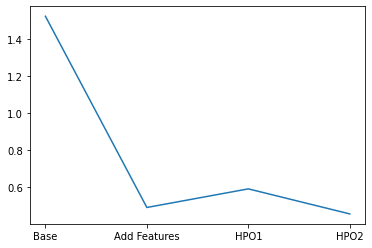

In [32]:
plt.plot(analysis_data['Scenario'], analysis_data['Kaggle Score'])
plt.show()

### The Best Performing Model
The Autogluon TabularPredictor makes use of many models and uses the Ensemble technique to come up with the best result. In the first training round, no model was specified. Autogluon TabularPredictor used the default models:

'CatBoostModel', 'WeightedEnsembleModel', 'LGBModel', 'KNNModel', 'XTModel', 'XGBoostModel', 'RFModel', 'NNFastAiTabularModel'

Of all these WeightedEnsembleModel had the best performance, followed by XGBoostModel.



### Feature Engineering

A bit of Feature Engineering was done to improve the perfoemance of the predictors.

The first one is the One-hot encoding of `season` into categorical data. 
The second one is the convertion of `weather` from numeric to categorical data., using Pandas `astype` function. The direct effect of these changes is the high score recorded. In addition, the datetime field is decomposed into its constituent values.

### Hyperparameter Tuning

The basic parameter that is tuned here is the `presets`. Values used include `medium_quality_faster_train` (default), `high_quality_fast_inference_only_refit` and `best_quality`. The graph shows improvements in the Kaggle score as we varied the value of the parameter

In [33]:
!jupyter nbconvert --to html bike-sharing.ipynb

[NbConvertApp] Converting notebook bike-sharing.ipynb to html
[NbConvertApp] Writing 921873 bytes to bike-sharing.html
